In [10]:
import pandas as pd
import os
from nltk import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2.5, style="whitegrid", rc={
    'figure.figsize':(8,4),
    "lines.linewidth": 3,
    "lines.markersize":20,
    "ps.useafm": True,
    "font.sans-serif": ["Helvetica"],
    "pdf.use14corefonts" : True,
    "text.usetex": True,
    })

DATA_DIR = "/data/test_mimic_output/"
BASE_DIR = "/home/joe/value-of-medical-notes/"

In [11]:
columns =  ['900001','900002','900003','900004','900005','900006','900007','900008','900010','900011','900012','900013','900014','900015', '900016']
note2id = {'Nursing/other': 900001, 'Physician': 900002, 'Nutrition': 900003, 'General': 900004, 'Nursing': 900005, 'Respiratory ': 900006,'Rehab Services': 900007, 'Social Work': 900008, 'Echo': 900010,'ECG': 900011,'Case Management ': 900012,'Pharmacy': 900013,'Consult': 900014, 'Radiology': 900015, 'Discharge summary': 900016}


In [12]:
period = "retro"
columns =  ['900001','900002','900003','900004','900005','900006','900007','900008','900010','900011','900012','900013','900014','900015', '900016']


is_notes = []
notes_count = np.zeros((len(columns),))
notes_word_count = np.zeros((len(columns),))
notes_word_len = {col:[] for col in columns}
notes_len_full = []
token_in_admissions = []
stays = []
feature_path = f'{DATA_DIR}/timeseries_features_retro/note_mask/'
note_path =  f'{DATA_DIR}/timeseries_features_retro/note/'
for i, stay in enumerate(os.listdir(feature_path)):
    if i%5000 == 0:
        print(f"processed {i} admission")
    tmp_word_len = {col:[] for col in columns}
    note_mask = np.load(os.path.join(feature_path, stay), allow_pickle=True).astype(float)
    notes_num = note_mask.sum(axis=0)
    notes_count += notes_num
    notes = pd.read_csv(os.path.join(note_path, stay[:-4]+'.csv')).fillna("")
    stays.append(stay[:-4]+'.csv')
    token_in_admission = 0
    for i, col in enumerate(columns):
        is_notes = note_mask[:,i]
        for n, is_note in zip(notes[col], is_notes):
            if is_note:
                n_len = len(word_tokenize(str(n)))
                notes_word_count[i] += n_len
                token_in_admission += n_len
                notes_word_len[col].append(n_len)
                tmp_word_len[col].append(n_len)
    notes_len_full.append(tmp_word_len)
    token_in_admissions.append(token_in_admission)



processed 0 admission
processed 5000 admission
processed 10000 admission


/data/anaconda3/envs/notes/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (10,11,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


processed 15000 admission
processed 20000 admission
processed 25000 admission
processed 30000 admission


/data/anaconda3/envs/notes/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


processed 35000 admission


/data/anaconda3/envs/notes/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


processed 40000 admission
processed 45000 admission


/data/anaconda3/envs/notes/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Average note length

In [13]:
avg_len = notes_word_count/notes_count
for l, n in zip(avg_len, note2id.keys()):
    print(f"{n:<20}, {l:.0f}")

Nursing/other       , 215
Physician           , 1369
Nutrition           , 602
General             , 290
Nursing             , 362
Respiratory         , 205
Rehab Services      , 622
Social Work         , 446
Echo                , 464
ECG                 , 43
Case Management     , 260
Pharmacy            , 512
Consult             , 1206
Radiology           , 449
Discharge summary   , 2195


## Percentage of notes appears in admission

In [14]:
patient2notes = pd.read_csv(f"{DATA_DIR}/patient2notes_retro.csv")
portion = np.sum(patient2notes[columns].values, axis=0)/len(patient2notes)
for l, n in zip(portion, note2id.keys()):
    print(f"{n:<20}, {100*l:<6.1f}")

Nursing/other       , 54.8  
Physician           , 18.2  
Nutrition           , 6.4   
General             , 6.4   
Nursing             , 18.4  
Respiratory         , 8.1   
Rehab Services      , 4.6   
Social Work         , 2.8   
Echo                , 45.8  
ECG                 , 61.3  
Case Management     , 1.3   
Pharmacy            , 0.1   
Consult             , 0.1   
Radiology           , 83.3  
Discharge summary   , 96.7  


## Counts of notes

In [15]:
for l, n, p, al in sorted(zip(notes_count, note2id.keys(), portion, avg_len), key=lambda x: x[0], reverse=True):
    print(f"{n:<20}, {l:<6.0f}, {100*p:<.1f}, {al:.0f}")

Nursing/other       , 417825, 54.8, 215
Radiology           , 338834, 83.3, 449
ECG                 , 123042, 61.3, 43
Physician           , 92426 , 18.2, 1369
Nursing             , 88703 , 18.4, 362
Discharge summary   , 47572 , 96.7, 2195
Echo                , 34064 , 45.8, 464
Respiratory         , 32798 , 8.1, 205
Nutrition           , 7971  , 6.4, 602
General             , 7710  , 6.4, 290
Rehab Services      , 5321  , 4.6, 622
Social Work         , 2294  , 2.8, 446
Case Management     , 939   , 1.3, 260
Pharmacy            , 97    , 0.1, 512
Consult             , 78    , 0.1, 1206


## Number of admission in our dataset

In [16]:
len(os.listdir(f'{DATA_DIR}/timeseries_features_retro/note/'))

49179

## Count of notes in all dataset
According to [offical documentation](https://mimic.physionet.org/mimictables/noteevents/), there should be 2,000,000 note events. But we only have 1.200,000 note events after cleaning data.

In [17]:
sum(notes_count)

1199674.0

## Length distribution of each note

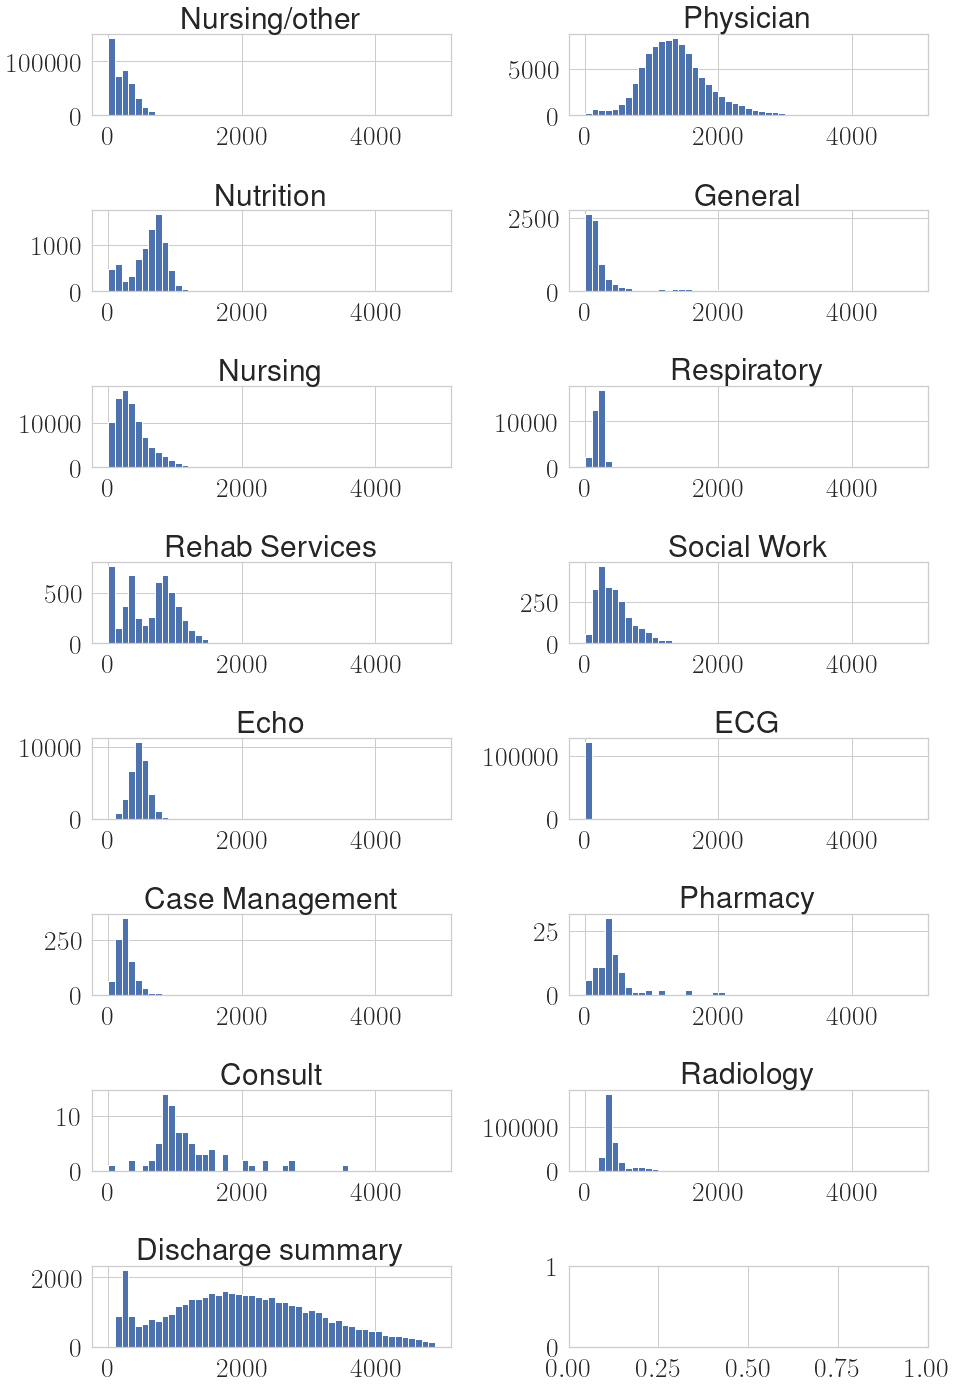

In [18]:
import matplotlib.pyplot as plt
k = list(note2id.keys())
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(8, 2, figsize=(14,20))
for i, n in enumerate(columns):
    ax[i//2, i%2].hist(notes_word_len[n], bins=list(range(0, 5000, 100)))
    ax[i//2, i%2].set_title(k[i])
f.tight_layout() 

## Distribution of number of each notes in an admission

In [19]:
notes_per_ad = []
feature_path = f'{DATA_DIR}/timeseries_features_retro/note_mask/'
note_path =  f'{DATA_DIR}/timeseries_features_retro/note/'
for i, stay in enumerate(os.listdir(feature_path)):
    if i%5000 == 0:
        print(f"processed {i} admission")
    note_mask = np.load(os.path.join(feature_path, stay), allow_pickle=True).astype(float)
    notes_num = note_mask.sum(axis=0)
    notes_per_ad.append(notes_num)

processed 0 admission
processed 5000 admission
processed 10000 admission
processed 15000 admission
processed 20000 admission
processed 25000 admission
processed 30000 admission
processed 35000 admission
processed 40000 admission
processed 45000 admission


In [20]:
notes_per_ad = np.stack(notes_per_ad)

### Without admissons that do not have that type of note

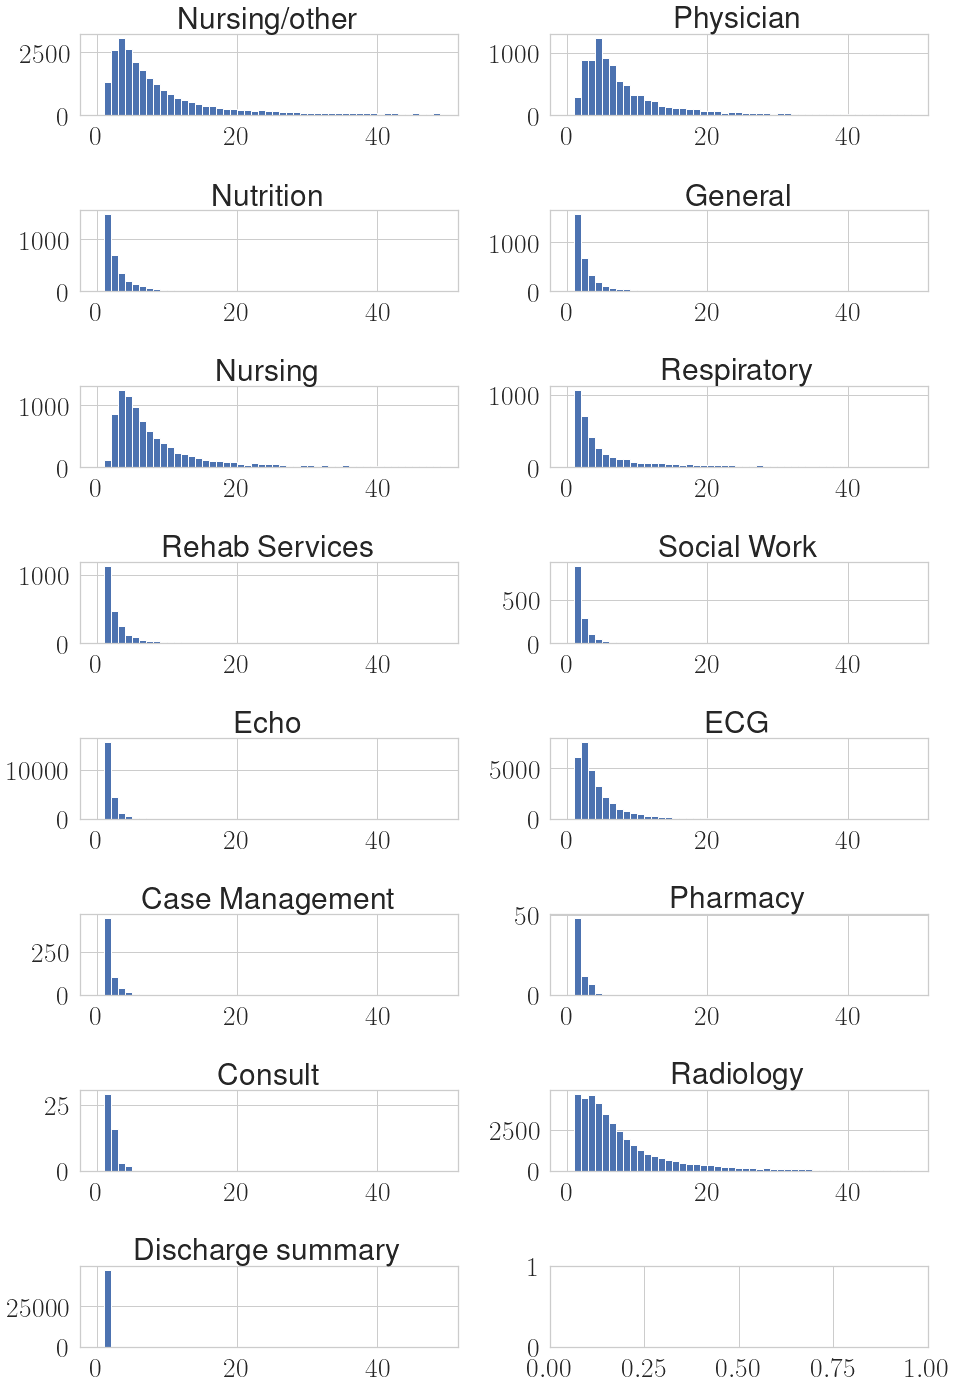

In [21]:
import matplotlib.pyplot as plt
k = list(note2id.keys())
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(8, 2, figsize=(14,20))
for i, n in enumerate(columns):
    ax[i//2, i%2].hist([a for a in notes_per_ad[:,i] if a != 0], bins=list(range(0, 50, 1)))
    ax[i//2, i%2].set_title(k[i])
f.tight_layout() 

### With admissons that do not have that type of note

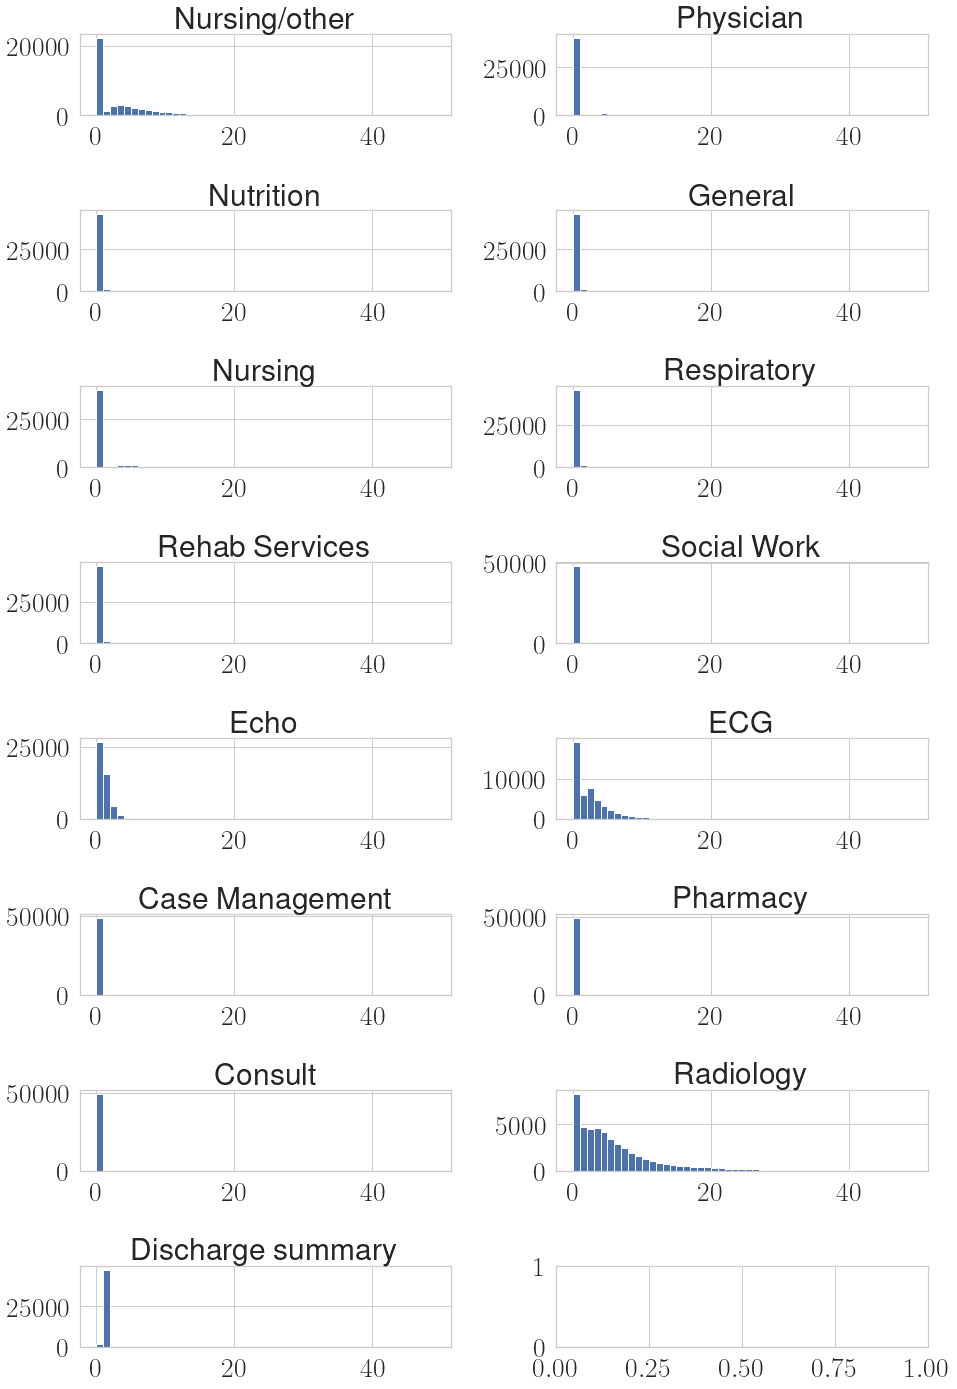

In [22]:
import matplotlib.pyplot as plt
k = list(note2id.keys())
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(8, 2, figsize=(14,20))
for i, n in enumerate(columns):
    ax[i//2, i%2].hist(notes_per_ad[:,i], bins=list(range(0, 50, 1)))
    ax[i//2, i%2].set_title(k[i])
f.tight_layout() 

## Overlap between Nrusing/other+Nursing notes and Physician notes

In [23]:
patient2notes = pd.read_csv(f"{DATA_DIR}/patient2notes_24.csv")
test_list = pd.read_csv(f'{DATA_DIR}/mortality/all_but_discharge_note_test_24.csv')
print(len(test_list))
patient2notes = patient2notes[patient2notes['stay'].isin(test_list['stay'])]
print(patient2notes[['900001', '900005', '900002']])
nursing_other = patient2notes['900001'].values
nursing = patient2notes['900005'].values
physician = patient2notes['900002'].values

n = nursing_other + nursing - (nursing_other * nursing)
print(sum(nursing_other * nursing))

6363
       900001  900005  900002
7         1.0     0.0     0.0
10        1.0     0.0     0.0
15        0.0     0.0     0.0
20        1.0     0.0     0.0
29        1.0     0.0     0.0
...       ...     ...     ...
48743     0.0     1.0     1.0
48748     0.0     0.0     0.0
48750     1.0     0.0     0.0
48765     0.0     0.0     0.0
48766     0.0     0.0     0.0

[6363 rows x 3 columns]
1.0


In [24]:
print("Number of physician ntoes", sum(physician))
print("Number of nursing ntoes", sum(nursing_other)+sum(nursing))
print("Number of overlap", sum((physician*n)>0))

Number of physician ntoes 562.0
Number of nursing ntoes 2205.0
Number of overlap 399


## Average len of Nursing and Nursing / other

In [25]:
nursing_len = notes_word_len['900001']+notes_word_len['900005']
print("avg len of nursing notes", sum(nursing_len)/len(nursing_len))

avg len of nursing notes 241.14005741044917


In [26]:
patient2notes = pd.read_csv(f"{DATA_DIR}/patient2notes_retro.csv")
nursing_other = patient2notes['900001'].values
nursing = patient2notes['900005'].values

n = nursing_other + nursing - (nursing_other * nursing)
print("portion", sum(n)/len(n))
print("Count", sum(n))

portion 0.7303930539457899
Count 35920.0


## Average token length of admissions

In [27]:
admission_len = []
for d in notes_len_full:
    tmp = 0
    for c in columns:
        tmp += sum(d[c])
    admission_len.append(tmp)

In [28]:
sum(admission_len)/len(admission_len)

11078.899794627789

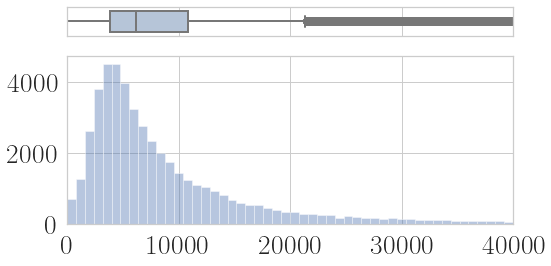

In [29]:
x = [i for i in token_in_admissions if i < 40000]
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(x, ax=ax_box, color='lightsteelblue',linewidth=2, width=.7)
sns.distplot(x, ax=ax_hist,kde = False)

# ax = sns.boxplot(x, linewidth=2, width=.5, color="skyblue")
# ax = sns.distplot(x,kde = False, ax=ax)

plt.xlim(0,40000)
if not os.path.exists("figure/data"):
    os.mkdir("figure/data")
plt.savefig('figure/data/token_per_admission.pdf')

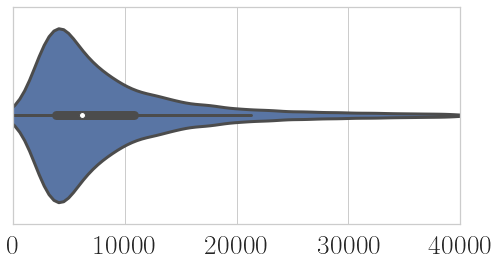

In [30]:
x = [i for i in token_in_admissions if i < 40000]
ax = sns.violinplot(x,kde = False)
plt.xlim(0,40000)
plt.savefig('figure/data/token_per_admission.pdf')

In [31]:
np.quantile(x, 0.25)

3830.0

In [32]:
feature_path = f'{DATA_DIR}/test/'
len(os.listdir(feature_path))

5762

# 25\% of discharge is ? \% is all

In [ ]:
import pandas as pd 
df_all = pd.read_csv(f'{DATA_DIR}/stay2token_all.csv')
df_dis = pd.read_csv(f'{DATA_DIR}/stay2token_discharge.csv')
df_dis = df_dis[df_dis['token_length']>0]
df_all = df_all[df_all['stay'].isin(df_dis['stay'])]
all_percent = []
for i, row in df_dis.iterrows():
    len_25 = row['token_length']/4.
    print(len_25)
    all_len = df_all[df_all['stay'] == row['stay']]['token_length'].iloc[0]
    print(all_len)
    all_percent.append(len_25/all_len)

In [14]:
print(len(all_percent))
print(sum(all_percent)/len(all_percent))


47572
0.08495608999122788


In [9]:
print(all_percent[0])

Series([], Name: token_length, dtype: float64)


In [42]:
df = pd.read_csv(f'{DATA_DIR}/timeseries_features_retro/note/83471_episode1_timeseries.csv")

## Selected sentences of different value function

In [49]:
import pandas as pd
import numpy as np
value = ["similarity_far_max_new_test", "similarity_near_max_new_test", "similaritymix_0.5_max_new_test", "fracmedicalsent_sim_norm"]
name = ["dissimilar", "similar", "mix-similar", "fraction"]
file_path = f'{DATA_DIR}/select_sentence/LR/readmission/{}_token_percent_5/text_all_retro.csv'
dfs = [pd.read_csv(file_path.format(v),engine='python') for v in value]

In [50]:
mae = dfs[2]['y_label']-dfs[2]['prob']
indice = np.argsort(mae**2)

In [ ]:
for i in indice:
    if df.iloc[i]['y_label']!=1: continue
    print("="*10+str(i)+"="*10)
    for n, df in zip(name, dfs):
        print(n+ " "+ df.iloc[i]['prob'].astype(str) + f" Label:{df.iloc[i]['y_label'].astype(str)}" +" :")
        print(df.iloc[i]['bestSents'])
        print()

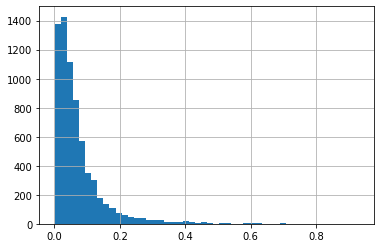

In [52]:
dfs[2]['prob'].hist(bins=50)